![](fig/bayesian-analysis-gentle-introduction.jpg)

<!--
The image on the left is a "Galton Board" or "bean machine" (invented by the prolific English scientist, Francis Galton). It consists of a vertical board with interleaved rows of pegs. Beads are dropped from the top and bounce left or right as they hit the pegs. Eventually, they are collected into bins at the bottom, where the height of the accumulated beads will eventually approximate a Normal distribution.

Those of you who attended my Data Science Workshop might be interested to know that the maths underlying the Galton Board depends on Pascal's Triangle.
-->

# Introduction to Bayesian Analysis with Python

Reality is complicated.

Science strives to understand reality by building models which make it easier to understand.

<!-- Use these statements to start the talk. -->

## What is a Model?

The British statistician George Box (1919-2013) had strong views about models.

![](fig/george-box-all-models-are-wrong.jpg)

In addition to his famous aphorism, he also had the following to say:

> Now it would be very remarkable if any system existing in the real world could be exactly represented by any simple model. However, cunningly chosen parsimonious models often do provide remarkably useful approximations.

> For such a model there is no need to ask the question "Is the model true?". If "truth" is to be the "whole truth" the answer must be "No". The only question of interest is "Is the model illuminating and useful?".

He was very pragmatic.

Richard McElreath, in his book [Statistical Rethinking](https://www.amazon.com/Statistical-Rethinking-Bayesian-Examples-Chapman/dp/1482253445), makes the analogy between models and the [Golem of Prague](https://en.wikipedia.org/wiki/Golem), saying that

> ... scientific models are neither true nor false, neither prophets nor charlatans.

A model's predictions will only be as good as the model's representation of reality.

If models are always "wrong", why do we use them? Because they are *useful*.

- To gain understanding.
- To test assumptions and hypotheses.
- To make predictions.

The value of a model is determined by how well it achieves these goals: how *useful* is it?

![](fig/golem-of-prague.jpg)

What is a model?

- A model is a (simplified or approximate) description of a system.
- A model embodies a set of assumptions.
- A model is generally formulated in a mathematical framework.
- A model often has parameters so that it can be applied to different systems.

Models can have varying levels of complexity, from simple to elaborate. 

One of the most important characteristics of a model is that it should be "generative", allowing one to use it to simulate new data. This also means that it can be tested by making predictions and seeing if those predictions are confirmed by observation.

### Model Parameters

Parameters allow the same model to be applied to different systems. For example:

- a Binomial Distribution can be applied to flipping a coin and rolling a dice; and
- a Normal Distribution can be used for observations of both height and mass.

Building a model then involves not only choosing the form of the model but also finding *appropriate* values for its parameters. This is done by fitting the model to observations.

## What is Bayesian Analysis?

Bayesian Analysis is an approach to fitting a model to a set of observations. Rather than deriving a point value for model parameters, the Bayesian approach yields an estimate of the distribution of those parameters.

### Why Bayesian Analysis?

*If I'm perfectly comfortable with my "normal" (Frequentist) data analysis, why would I consider Bayesian analysis?*

Frequentist techniques normally involve *hypothesis testing* which

- choosing the right hypothesis test can be challenging (there's a jungle of them!);
- often rely on "asymptotic" behaviour and so demand large samples;
- interpreting the results of a hypothesis test can be tricky;
- have some concepts (like confidence intervals and $p$ values) which are hard to explain and reason about; and
- arbitrary thresholds (like 0.05 or 0.01).

I'm not bashing Frequentist techniques, just pointing out that they have challenges.

One of the fundamental ideas behind hypothesis testing is that a hypothesis should be "refutable". This forms the basis for [Karl Popper](https://en.wikipedia.org/wiki/Karl_Popper)'s interpretation of the Scientific Method:

> The growth of our knowledge is the result of a process closely resembling what Darwin called “natural selection”; that is, the natural selection of hypotheses: our knowledge consists, at every moment, of those hypotheses which have shown their (comparative) fitness by surviving so far in their struggle for existence, a competitive struggle which eliminates those hypotheses which are unfit.

Rejecting a hypothesis depends on the probability of samples which are at least as extreme as the observed data. These are *fictional samples*. According to the British scientist [Harold Jeffreys](https://en.wikipedia.org/wiki/Harold_Jeffreys):

> ... a hypothesis that may be true may be rejected because it has not predicted observable results that have not occurred.

Weirdly ironic.

By contrast, Bayesian techniques...

- work with any sample size;
- are very flexible;
- are able to integrate existing knowledge (∴ use all available information);
- are not predicated on arbitrary thresholds or hypothetical observations; and
- results normally a lot easier to explain and justify.

What does a Bayesian model look like? It consists of two components, which are normally formulated in the following order:

1. the likelihood (a function of the data and one or more parameters) and
3. a prior for each parameter.

![](fig/xkcd-frequentists-vs-bayesians.png)

### Parameter Estimation

Suppose that you have a model with an unknown parameter, $\theta$.

It's very unlikely that you know absolutely nothing about $\theta$. If this were the case then you should probably question whether you have an appropriate model! Whatever existing knowledge you have about $\theta$ is wrapped up in the *prior* probability distribution, $p(\theta)$.

What we are aiming to derive is the *posterior* probability distribution, $p(\theta|X)$, which reflects our knowledge about $\theta$ conditional on some observations $X$.

Given a the model and a specific value of $\theta$ it should be simple to calculate the (joint) probability of the observations. This is known as the *likelihood*, $p(X|\theta)$.

Bayes' Theorem (also known as *Bayes' Formula*, *Bayes' Rule* and *Bayes' Law*) gives the posterior in terms of the prior and likelihood:

![](fig/bayes-theorem.gif)

Let's break this down into components:

- $p(\theta|X)$ - the posterior
- $p(\theta)$ - the prior
- $p(X|\theta)$ - the likelihood and
- $p(X)$ - the evidence or marginal likelihood.

<!--
Another way of formulating Bayes' Theorem is

$$
p(X, \theta) = p(\theta|X) p(X) = p(X|\theta) p(\theta).
$$

where $p(X, \theta)$ is the joint probability of the data and parameters.

How can we think about the process of parameter estimation?

Well, we know what the observed data, $X$, looks like. If we think of the model as a generative process and we are able to simulate data for all possible values of $\theta$, then we are looking for the value of $\theta$ where the simulated data look most similar to the observed data.
-->

Two components of Bayes' Theorem require further explanation.

![https://xkcd.com/2059/](fig/xkcd-modified-bayes-theorem.png)

### Evidence

The evidence is given by

$$
p(X) = \int p(X|\theta) p(\theta) \,\text{d}\theta.
$$

This integrates the likelihood over all possible parameter values. It's the probability that the data were generated by the chosen model.

As it happens, this is the computationally challenging component of Bayes' Theorem. We'll see that there are efficient techniques that allow us to bypass the evaluation of the evidence.

### Prior

The prior captures the existing knowledge about the distribution of $\theta$ before accounting for the observations.

Where does the prior come from? Domain knowledge: what we know about the problem before we examine the observations. There's (almost) *always* some information available which allows you to formulate a reasonable prior.

The prior can also help you apply constraints to parameters. For example, if you know that a parameter can only assume positive values then you can enforce this by choosing a prior distribution that only has positive support.

The time required for the posterior to converge can depend on a suitable choice for the prior. The better the guess for the shape of the prior, the sooner you'll get good results.

Although the prior can be an arbitrary function of $\theta$, it's more common to use a standard distribution. What are some typical priors?

- [Normal](https://en.wikipedia.org/wiki/Normal_distribution) distribution
- [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) (or Lorentz) distribution (like a Normal distribution but with heavy tails)
- [Laplace](https://en.wikipedia.org/wiki/Laplace_distribution) distribution
- [Beta](https://en.wikipedia.org/wiki/Beta_distribution) distribution.
- [Uniform](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) distribution and
- [Exponential](https://en.wikipedia.org/wiki/Exponential_distribution) distribution.

In [19]:
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

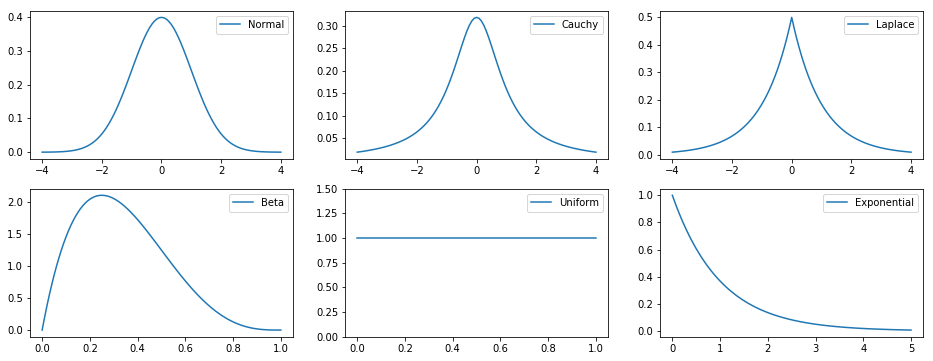

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (16, 6))
ax = np.ravel(ax)
x = np.linspace(-4, 4, 101)
ax[0].plot(x, stats.norm().pdf(x), label='Normal')
ax[1].plot(x, stats.cauchy().pdf(x), label = 'Cauchy')
ax[2].plot(x, stats.laplace().pdf(x), label = 'Laplace')
x = np.linspace(0, 1, 101)
ax[3].plot(x, stats.beta(2, 4).pdf(x), label='Beta')
ax[4].plot(x, stats.uniform().pdf(x), label='Uniform')
ax[4].set_ylim(0, 1.5)
x = np.linspace(0, 5, 101)
ax[5].plot(x, stats.expon().pdf(x), label='Exponential')
for n in range(6):
    ax[n].legend()
plt.show();

## Example Models

Let's take a look at a couple of models which will make these ideas more concrete.

### Binomial Process

Consider a coin flipping experiment where the two possible outcomes are heads (1) and tails (0). There are a couple of ways to model this.

1. $y \sim \text{Bernoulli}(\theta)$  - a Bernoulli process which models each individual flip. The model has a parameter, $\theta$, which represents success probability.
2. $y \sim \text{Binomial}(\theta)$ - a Binomial process which models the number of heads, $k$, in a batch of $n$ flips. Uses the same parameter, $\theta$.

What about priors?

- We know that $\theta$ lies between 0 and 1, so a weak prior would simply be $\theta \sim \text{Uniform}(0, 1)
$.
- We know that $\theta$ is more likely to be somewhere in the middle of the interval, we could use something more informative like $\theta \sim \text{Beta}(5, 5)$.

### Linear Regression

Consider a model for the relationship between height [m] and mass [kg]. A plausible model might be

$$
y = N(\alpha + \beta x, \sigma)
$$

Consider two sets of priors. We don't really know too much about $\alpha$ apart from the fact that ideally mass should tend to zero when height becomes small. A reasonable value for $\beta$ might be around 50 kg/m.

A reasonable starting point might be the following (vague) priors:

$$
\begin{align}
\alpha &\sim \text{Uniform}(-5, 5) \\
\beta &\sim \text{Uniform}(30, 70).
\end{align}
$$

We could encapsulate some more information in these priors though, because we know, for example, that $\beta = 50$ is more likely than $\beta = 30$ or $\beta = 70$.

$$
\begin{align}
\alpha &\sim \text{Normal}(0, 5) \\
\beta &\sim \text{Normal}(50, 10).
\end{align}
$$

In both cases we are saying what we think are the most likely values for the parameters, but also giving a degree of latitude to allow for the fact that these values might be _wrong_!

## Simple Model Implementation: Tossing a Coin

Consider the simple coin flipping model $y \sim \text{Bernoulli}(\theta)$.

**Note:** We can easily generate an analytical solution for this model because the Beta distribution is the [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) for the Binomial distribution, so that the posterior is also a Beta distribution (and the parameters of the prior and posterior are simply related).

In [21]:
def normalise(y, x):
    return y / np.trapz(y, x)

Our observations.

In [22]:
observed = np.array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [23]:
k = observed.sum()
n = observed.size

In [24]:
print('%d successes from %d trials (mean %.3f).' % (k, n, observed.mean()))

15 successes from 20 trials (mean 0.750).


### Bernoulli Model

We will solve the problem using the "grid approximation", where the prior, likelihood and posterior are evaluated on a grid of points.

Set up the prior as samples on a grid.

In [25]:
N = 201

# Values of theta on [0, 1].
theta = np.linspace(0, 1, N)
# Uniform prior.
prior = normalise(np.repeat(1, N), theta)

A simple function to do a Bayesian update.

In [26]:
# k = 0 - failure (tails)
# k = 1 - success (heads)
def bernoulli_model(k, theta, prior):
    likelihood = theta**k * (1 - theta)**(1 - k)
    return normalise(likelihood * prior, theta)

Now perform a series of updates and plot both the prior (dashed) and posterior (solid).

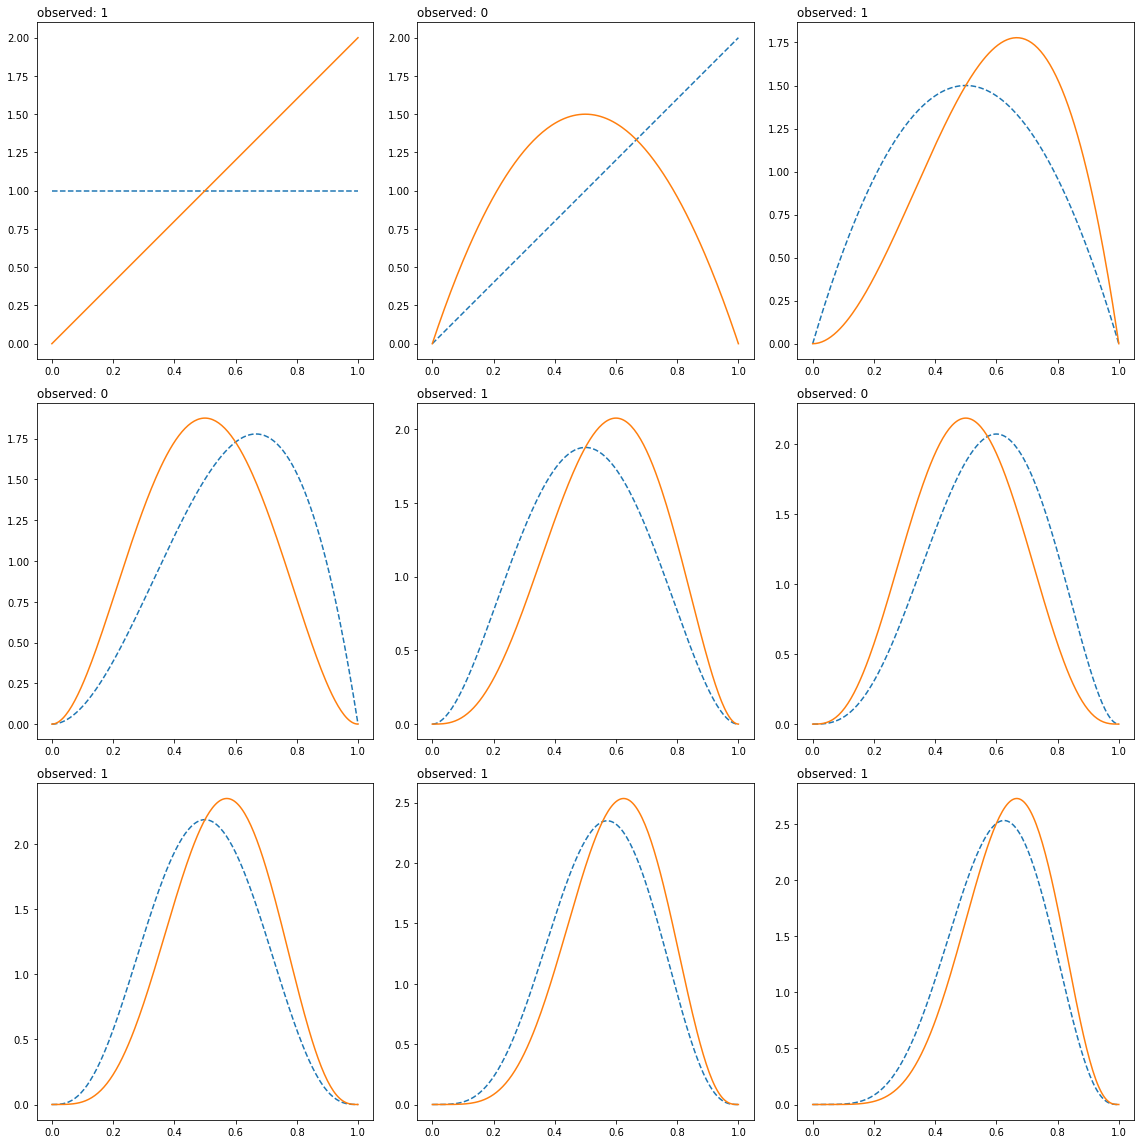

In [27]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(16, 16))
ax = np.ravel(ax)

for i in range(9):
    posterior = bernoulli_model(observed[i], theta, prior)

    ax[i].plot(theta, prior, linestyle='--');
    ax[i].plot(theta, posterior);
    ax[i].set_title('observed: %d' % observed[i], loc='left');
    
    prior = posterior

plt.tight_layout();

After the first update the distribution has zero for $\theta = 0$. Why? We have observed one success so we know immediately that there is a non-zero success probability. The coin does not have two tails!

After the second update the distribution is zero at $\theta = 1$. Why? We have observed one failure, so we know that success is not certain. The coin does not have two heads.

I like to think of the distribution after the second iteration as the "McDonalds Posterior".

Successive updates result in progressively narrower distributions. The distribution that emerges is a Beta distribution!

The observations can be presented to the model in any order and still achieve the same result. Equally, the observations can all be processed at once by formulating their joint likelihood.

### Binomial Model

Let's take the same set of data and use a different (but complementary) model.

In [28]:
# k - number of successes
# n - number of trials
# alpha, beta - parameters of Beta distribution
#
def binomial_model(k, n, alpha, beta):
    theta = np.linspace(0, 1, 201)

    prior = stats.beta(alpha, beta)
    posterior = stats.beta(alpha + k, beta + n - k)
    # Normalise the likelihood (for plotting purposes only!).
    likelihood = [stats.binom.pmf(k, n, t) for t in theta]
    likelihood = normalise(likelihood, theta)

    plt.figure(figsize=(16, 4))
    plt.plot(theta, prior.pdf(theta), label='Prior', linestyle='--')
    plt.plot(theta, posterior.pdf(theta), label='Posterior')
    plt.plot(theta, likelihood, label='Likelihood (normalised)')
    plt.xlim((0, 1))
    plt.legend();
    
    return (theta, posterior)

A completely uninformative (uniform) prior results in a posterior which mirrors the likelihood.

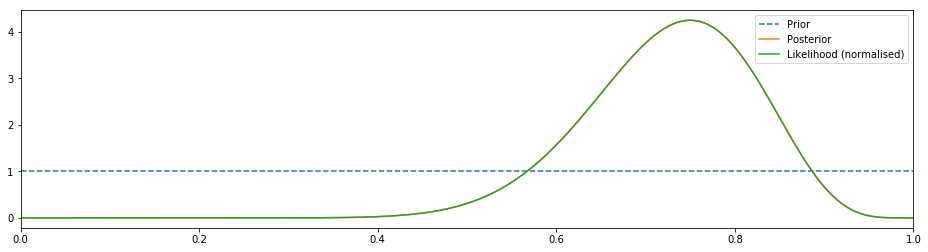

In [29]:
binomial_model(k, n, 1, 1);

A weakly informative prior is dominated by the new data, but does still have an effect on the posterior.

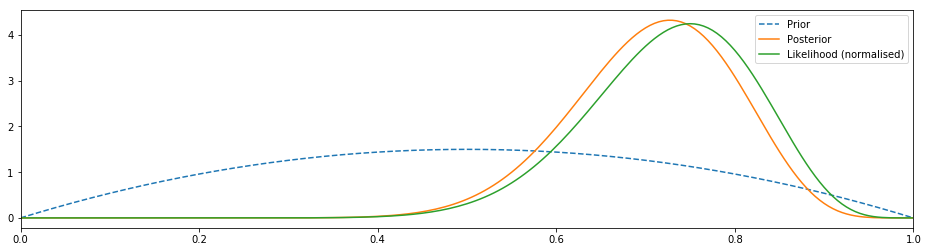

In [30]:
binomial_model(k, n, 2, 2);

An *opinionated* prior has a stronger influence than the new data, although the data do shift the posterior.

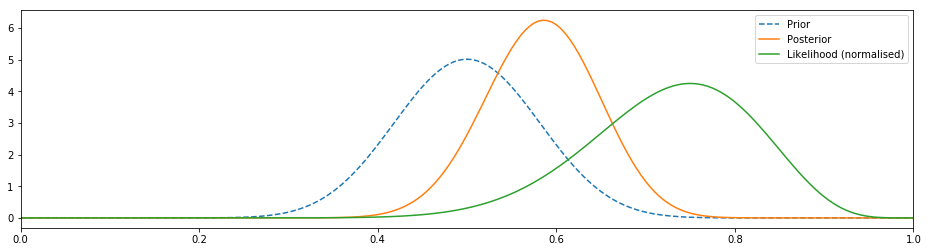

In [31]:
theta, posterior = binomial_model(k, n, 20, 20)

The prior has moderated or *regularised* the results of the observations.

A Bayesian model is always generative: we can use it to generate new samples. These new samples will not use a point estimate of the model parameters. No! Rather they will sample parameters from the posterior distribution. The new samples therefore capture the parameter uncertainty too.

First sample the parameter from the posterior.

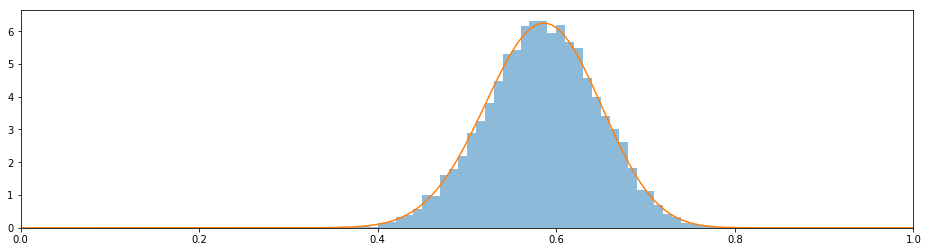

In [32]:
# Samples from the posterior distribution.
posterior_samples = posterior.rvs(10000)

plt.figure(figsize=(16, 4))
plt.hist(posterior_samples, bins=np.linspace(0, 1, 101), alpha=0.5, density=True);
plt.plot(theta, posterior.pdf(theta))
plt.xlim((0, 1));

Now use the parameter samples to generate new data from the underlying process.

In [33]:
process_samples = [stats.bernoulli.rvs(p) for p in posterior_samples]

## Epilogue

For most models a simple analytical solution (like the ones used above) will be impossible. They are "analytically intractable". In this case you will need to resort to numerical techniques. Fortunately there's a variety of options for doing numerical Bayesian analysis with Python.